# Analysis of Data Science Salaries in 2024

Created by: Ricky Jay Gomez

![New York City schoolbus](data-science.png)

## Description

This analysis aims to check which are the top jobs within the Data Science field in terms of salaries, work type and arrangement, location, and many more. The insights in this report help data professionals decide which job should they pursue that would be aligned to their career, financial, and other personal goals. Furthermore, this work specifically answers the following questions:
- What is the highest paid Data Science job title in 2024?
- Which job seniority level is most sought-after by companies?
- Are there chances for freelance jobs within the Data Science space?
- What are the odds that I can land a remote Data Science job this year? As a foreigner, is there a chance that I can work in the US within the Data Science field remotely?
- Will Data Science field be saturated in the coming years?
- Which country offers the highest average salary?
- Do Data Science jobs salaries increase year-per-year?
- Do people working on-site earn more than working remotely?

### The Dataset
The data used in this project is imported from Sazidul Islam (Kaggle) which is retried from `https://ai-jobs/net/`. It includes Data Science salar information from 2020 t0 2024. The file `data_science_salaries.csv` contains data with the following columns:

| Column | Description |
|--------|-------------|
| `job_title` | The job title or role associated with the reported salary. |
| `experience_level` | The level of experience of the individual. |
| `employment_type` | Indicates whether the employment is full-time, part-time, etc. |
| `work_models` | Describes different working models (remote, on-site, hybrid). |
| `work_year` | The specific year in which the salary information was recorded. |
| `employee_residence` | The residence location of the employee. |
| `salary` | The reported salary in the original currency. |
| `salary_currency` | The currency in which the salary is denominated. |
| `salary_in_usd` | The converted salary in US dollars. |
| `company_location` | The geographic location of the employing organization. |
| `company_size` | The size of the company, categorized by the number of employees. |

## Downloading libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [4]:
# Importing dataset from Kaggle
ds_data = pd.read_csv('data_science_salaries.csv')
ds_data.head(10)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


## Exploratory data analysis

### Data cleaning

In [5]:
# Checking the data info
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [6]:
# Checking the data shape
ds_data.shape

(6599, 11)

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64


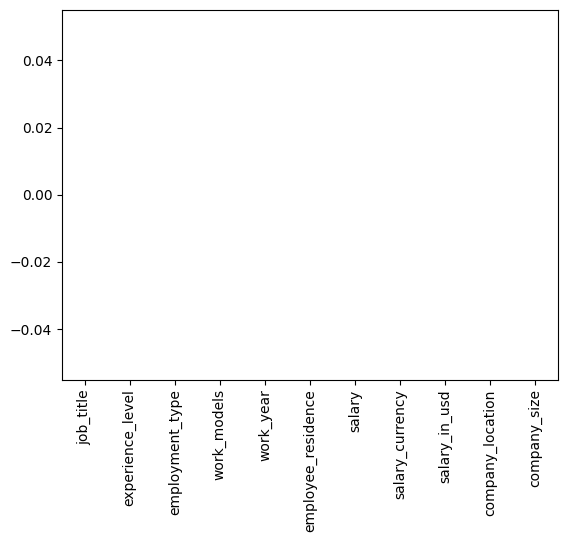

In [7]:
# Are there missing values?
print(ds_data.isna().sum())

ds_data.isna().sum().plot(kind = 'bar')
plt.show()

### Summary Statistics

In [8]:
# Checking the data as summary statistics
ds_data.describe().round(2)

,work_year,salary,salary_in_usd
count,6599.00,6599.00,6599.00
mean,2022.82,179283.26,145560.56
std,0.67,526372.24,70946.84
min,2020.00,14000.00,15000.00
25%,2023.00,96000.00,95000.00
50%,2023.00,140000.00,138666.00
75%,2023.00,187500.00,185000.00
max,2024.00,30400000.00,750000.00


### Q1: What is the highest paid Data Science job titles in 2024?

In [9]:
# Subsetting ds_data for Q1: ds_data_q1
ds_data_q1 = ds_data[['job_title','salary_in_usd','work_year']]
ds_data_q1.head()

,job_title,salary_in_usd,work_year
0,Data Engineer,148100,2024
1,Data Engineer,98700,2024
2,Data Scientist,140032,2024
3,Data Scientist,100022,2024
4,BI Developer,120000,2024


In [74]:
# The average salary per job title per year: top_job_title_per_year
avg_job_salary = ds_data_q1.groupby(['work_year','job_title'])['salary_in_usd'].mean().reset_index(level = 0).sort_values(['work_year','salary_in_usd'], ascending = [False,False]).round(2)

top_job_title_per_year = {}
years = [2020,2021,2022,2023,2024]

for year in years :
    top_job_title_per_year[f'top_job_title_per_year_{year}'] = avg_job_salary[avg_job_salary['work_year'] == year].head(3)

top_job_title_per_year

{'top_job_title_per_year_2020':                                 work_year  salary_in_usd
 job_title                                               
 Director of Data Science             2020       325000.0
 Managing Director Data Science       2020       300000.0
 Machine Learning Scientist           2020       260000.0,
 'top_job_title_per_year_2021':                                     work_year  salary_in_usd
 job_title                                                   
 Cloud Data Architect                     2021       250000.0
 Principal Data Scientist                 2021       239152.4
 Applied Machine Learning Scientist       2021       230700.0,
 'top_job_title_per_year_2022':                         work_year  salary_in_usd
 job_title                                       
 Data Analytics Lead          2022       405000.0
 Data Science Tech Lead       2022       375000.0
 AI Developer                 2022       275000.0,
 'top_job_title_per_year_2023':                       

In [165]:
avg_job_salary_count = ds_data_q1.value_counts().reset_index().set_index('job_title').groupby('job_title').count().sort_values('count',ascending = False)['count'].head(5)
print('Top 5 Data Science Job Titles In Terms of Availability: ')
print('###################################')
print(avg_job_salary_count)

Top 5 Data Science Job Titles In Terms of Availability: 
###################################
job_title
Data Scientist               917
Data Engineer                886
Data Analyst                 612
Machine Learning Engineer    501
Analytics Engineer           193
Name: count, dtype: int64


#### Q1 Insights:
Based on the results per year analysis, jobs related to **'AI'** and **'Machine Learning Scientist'** are the hottest Data Science job titles in terms of the average annual salary. The top 3 among them for the year 2024 are the **'Machine Learning Scientist'**, **'Managing Director Data Science'**, and **'AI Architect'**. In terms of the frequency of appearance in job boards, the top 5 job titles are **Data Scientist**, **Data Enginee**, **Data Analyst**, **Machine Learning Engineer**, and **Analytics Engineer**.

### Q2: Which job seniority level is most sought-after by companies?

In [11]:
# Subsetting ds_data for Q2: ds_data_q2
ds_data_q2 = ds_data[['job_title','experience_level']]
ds_data_q2.head()

,job_title,experience_level
0,Data Engineer,Mid-level
1,Data Engineer,Mid-level
2,Data Scientist,Senior-level
3,Data Scientist,Senior-level
4,BI Developer,Mid-level


In [12]:
# Comparison between the number of jobs available per seniority level: jobs_seniority
jobs_seniority = ds_data_q2.groupby('experience_level')['job_title'].count()
jobs_seniority


experience_level
Entry-level         565
Executive-level     254
Mid-level          1675
Senior-level       4105
Name: job_title, dtype: int64

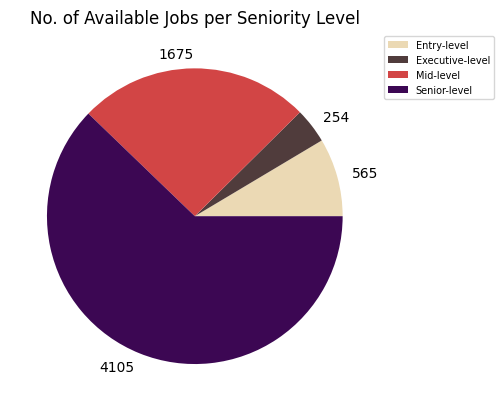

In [13]:
# Visualize the result

jobs_seniority.plot(kind = 'pie', colors =  ['#EBD9B4','#503C3C','#D24545','#3C0753'], labels = jobs_seniority)
plt.xlabel('')
plt.ylabel('')
plt.title('No. of Available Jobs per Seniority Level')
plt.legend(jobs_seniority.reset_index()['experience_level'],loc='best', bbox_to_anchor=(1, 1), fontsize = 7)
plt.show()

#### Q2 Insights
The figure shows that the number **Senior Level** positions is way higher compared to the other seniority levels from 2020 to 2024. Based on this trend, companies are more likely to look for experienced candidates in the Data Science field. Thus, **it would be a little harder for the freshers to find a Data Science job** so they should make an extra effort to stand out in the pool of professionals within this space.

### Q3: Are there chances for freelance jobs within the Data Science space?

In [14]:
# Subsetting ds_data for Q3: ds_data_q3
ds_data_q3 = ds_data[['job_title','employment_type','work_year','salary_in_usd']]
ds_data_q3.head()

,job_title,employment_type,work_year,salary_in_usd
0,Data Engineer,Full-time,2024,148100
1,Data Engineer,Full-time,2024,98700
2,Data Scientist,Full-time,2024,140032
3,Data Scientist,Full-time,2024,100022
4,BI Developer,Full-time,2024,120000


In [15]:
emp_types_available = ds_data_q3.pivot_table(values = 'job_title', index = 'employment_type', aggfunc = 'count', columns = 'work_year', fill_value=0, margins = True).sort_values(by = 'All', ascending = False)
emp_types_available

work_year,2020,2021,2022,2023,2024,All
employment_type,,,,,,
All,75,216,1112,4625,571,6599
Full-time,69,206,1098,4609,570,6552
Contract,3,3,4,9,0,19
Part-time,2,4,6,3,1,16
Freelance,1,3,4,4,0,12


In [16]:
print('The freelance jobs account for ' + str(((emp_types_available['All'].Freelance / emp_types_available['All'].All) * 100).round(2)) + '% of all Data Science jobs available in the dataset.')

The freelance jobs account for 0.18% of all Data Science jobs available in the dataset.


#### Q3 Insights:
Compared to the other employment types, the number of companies posting freelance Data Science jobs in job boards is slim. Although, this doesn't account that there are websites for companies who are specifically looking for freelance Data Scientists such as Upwork, Fiverr, etc.

### Q4: What are the odds that I can land a remote Data Science job this year? As a foreigner, is there a chance that I can work in the US within the Data Science field remotely?

In [17]:
# Subsetting ds_data for Q4: ds_data_q4
ds_data_q4 = ds_data[['job_title','work_models','work_year','employee_residence','company_location']]
ds_data_q4.head()

,job_title,work_models,work_year,employee_residence,company_location
0,Data Engineer,Remote,2024,United States,United States
1,Data Engineer,Remote,2024,United States,United States
2,Data Scientist,Remote,2024,United States,United States
3,Data Scientist,Remote,2024,United States,United States
4,BI Developer,On-site,2024,United States,United States


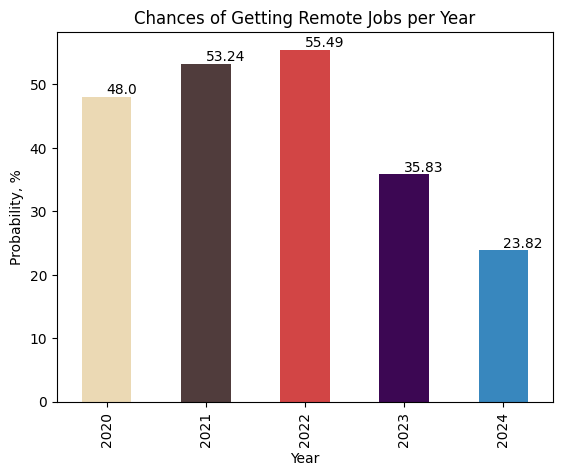

In [18]:
# Subsetting all remote jobs available per year: all_remote
all_remote = ds_data_q4.set_index('work_models').loc['Remote'].reset_index()

all_remote_sum = all_remote.groupby('work_year')['job_title'].count()

# Counting all jobs available per year: all_jobs
all_jobs = ds_data_q4.groupby('work_year')['job_title'].count()

# Probability of getting a remote job
prob_remote = ((all_remote_sum / all_jobs) * 100).round(2)

prob_remote.plot(kind = 'bar', color = ['#EBD9B4','#503C3C','#D24545','#3C0753','#3887BE'])
plt.xlabel('Year')
plt.ylabel('Probability, %')
plt.title('Chances of Getting Remote Jobs per Year')
for index,row in enumerate(prob_remote) :
    plt.text(index,row,s = row, fontsize = 10, ha='left', va='bottom')
plt.show()


In [19]:
# Number of remote jobs available for foreigners: foreigner_remote
foreigner_remote = all_remote[all_remote.employee_residence != all_remote.company_location]['job_title'].count()

# Portion of remote jobs available for foreigners: foreigner_remote_prop
foreigner_remote_prop = ((foreigner_remote / all_remote_sum.sum())*100).round(2)
print(str(foreigner_remote_prop) + '% of all remote jobs are available to foreigners.') 

3.71% of all remote jobs are available to foreigners.


#### Q4 Insights:
The chances of getting remote jobs vary year-by-year. From 2020 to 2022, the number of remote jobs increase but significantly dropped in 2023. Possible reason could be due to the lifting of COVID19 pandemic which urged companies to switch back to on-site work settings. Although 2024 has the least value based on the figures, it is not yet conclusive of the final probability of remote jobs this year since it is only nearly the end of its first month during this writing. 

On the other hand, only 3.71% makes up the remote jobs available to foreigners based on the overall number of remote jobs posted over the last 5 years. This finding means that a very few number of international employers hire someone from different country. Thus, the competition for people who wants to work for companies from the other countries while being at their home countries is huge. Although there is a significant portion of the remote jobs, still, companies prefer more hiring workforce coming from the same country. 

### Q5: Will Data Science field be saturated in the coming years?

In [20]:
# Subsetting ds_data for Q5: ds_data_q5
ds_data_q5 = ds_data[['job_title','work_year']]
ds_data_q5.head()

,job_title,work_year
0,Data Engineer,2024
1,Data Engineer,2024
2,Data Scientist,2024
3,Data Scientist,2024
4,BI Developer,2024


In [21]:
# Total number of jobs available per year: total_jobs_per_year
total_jobs_per_year = ds_data_q5.pivot_table(values = 'job_title', index = 'work_year', aggfunc = 'count').reset_index()
total_jobs_per_year = total_jobs_per_year[:4]
total_jobs_per_year

,work_year,job_title
0,2020,75
1,2021,216
2,2022,1112
3,2023,4625


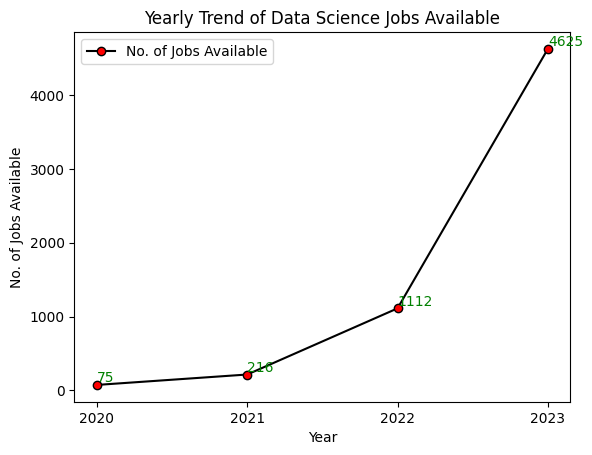

In [22]:
# Visualize yearly trend
total_jobs_per_year.plot('work_year','job_title', marker = 'o', markerfacecolor = 'red', color = 'black')
plt.xticks(np.arange(min(total_jobs_per_year.work_year.values), max(total_jobs_per_year.work_year.values)+1, 1))
for index, row in total_jobs_per_year.iterrows():
    plt.text(row.work_year, row.job_title, s = row.job_title, fontsize = 10, ha='left', va='bottom', color = 'green')
plt.xlabel('Year')
plt.ylabel('No. of Jobs Available')
plt.title('Yearly Trend of Data Science Jobs Available')
plt.legend(labels = ['No. of Jobs Available'])
plt.show()

#### Q5 Insights:
The year-by-year trend of the number of available jobs imply that a huge demand in Data Science professionals is expected in the coming years; probably, as companies shift to data-driven strategy of decision-making for their businesses. Alongside, the boom of AI and ML opportunities greatly contribute to the trend of available Data Science positions in the job market. To wrap up, the jobs available in the Data Science field is not expected to be saturated in the coming years based on the current yearly trend of data. 

### Q6: Which country offers the highest average salary?

In [23]:
# Subsetting ds_data for Q6: ds_data_q6
ds_data_q6 = ds_data[['job_title','experience_level','work_year','salary_in_usd','company_location','company_size']]
ds_data_q6.head()

,job_title,experience_level,work_year,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,2024,148100,United States,Medium
1,Data Engineer,Mid-level,2024,98700,United States,Medium
2,Data Scientist,Senior-level,2024,140032,United States,Medium
3,Data Scientist,Senior-level,2024,100022,United States,Medium
4,BI Developer,Mid-level,2024,120000,United States,Medium


/var/folders/8l/697km13d3bv5twb49p892q2m0000gn/T/ipykernel_49454/3147810194.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(data_subset['Country'].values, rotation=90)
/var/folders/8l/697km13d3bv5twb49p892q2m0000gn/T/ipykernel_49454/3147810194.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(data_subset['Country'].values, rotation=90)
/var/folders/8l/697km13d3bv5twb49p892q2m0000gn/T/ipykernel_49454/3147810194.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(data_subset['Country'].values, rotation=90)
/var/folders/8l/697km13d3bv5twb49p892q2m0000gn/T/ipykernel_49454/3147810194.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of t

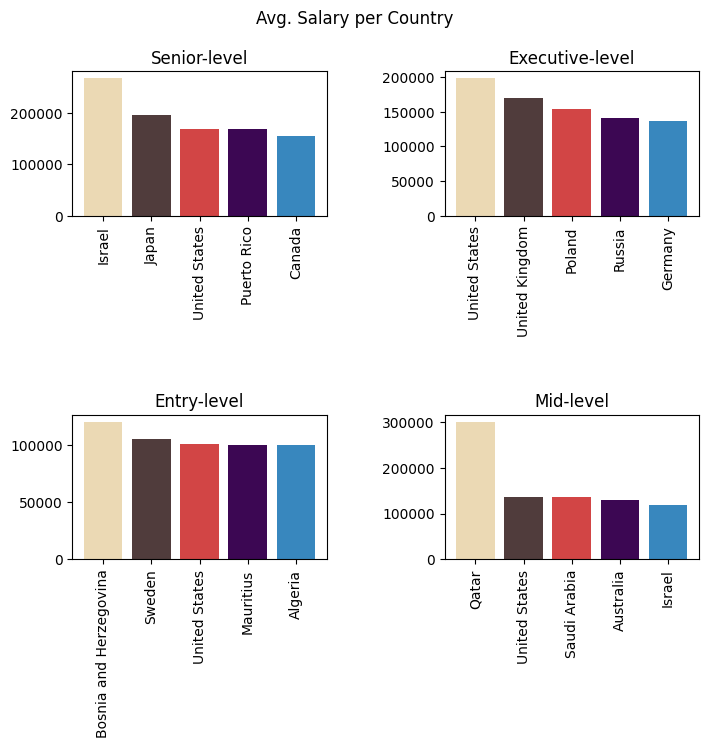

In [73]:
# Salaries per country: salary_per_country
salary_per_country = ds_data.groupby(['company_location','experience_level'])['salary_in_usd'].mean().reset_index().round(2).sort_values('salary_in_usd', ascending = False)

salary_per_country.columns = ['Country', 'Seniority Level', 'Mean Salary']

# Top 5 highest paying country in Data Science field: top_5_countries
seniority = salary_per_country['Seniority Level'].unique()
top_5_countries = []

for level in seniority :
    list_items = salary_per_country[salary_per_country['Seniority Level'] == level].head(5).reset_index(drop = True)
    top_5_countries.append(list_items)

top_5_countries = pd.concat(top_5_countries)

# Visualize

seniority_levels = top_5_countries['Seniority Level'].unique()

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

for i, level in enumerate(seniority_levels):
    subplot = ax[(i - 1) // 2, (i - 1) % 2]
    data_subset = top_5_countries[top_5_countries['Seniority Level'] == level]

    subplot.bar(data_subset['Country'], data_subset['Mean Salary'], color=['#EBD9B4','#503C3C','#D24545','#3C0753','#3887BE'], label=level)
    subplot.title.set_text(f'{level.capitalize()}')
    subplot.set_xticklabels(data_subset['Country'].values, rotation=90)

fig.tight_layout(pad=4.0)
fig.suptitle('Avg. Salary per Country')
plt.show()

In [ ]:
# Relationship between salary and company size: salary_vs_company_size

salary_vs_company_size = ds_data.groupby('company_size')['salary_in_usd'].mean().round(2).reset_index().sort_values('company_size', ascending = False).reset_index(drop = True)
salary_vs_company_size.columns = ['Company Size','Mean Salary']
salary_vs_company_size

,Company Size,Mean Salary
0,Small,87687.46
1,Medium,149659.39
2,Large,120638.40


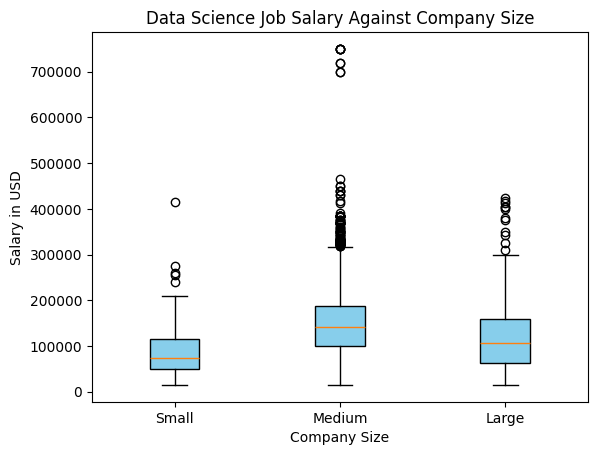

In [69]:
# Visualize comparison
salary_vs_company_size_bp = ds_data[['company_size', 'salary_in_usd']].sort_values('company_size', ascending = False)

size = salary_vs_company_size_bp['company_size'].unique()

data = []

for s in size :
    vals = salary_vs_company_size_bp[salary_vs_company_size_bp['company_size'] == s].salary_in_usd.values
    data.append(vals)

plt.boxplot(data, labels = size, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.title('Data Science Job Salary Against Company Size')
plt.show()

#### Q6 Insights:
This analysis answers the question on which countries offer the highest Data Science job salaries. To achieve a more reliable result of analysis, the data is grouped by seniority since more experienced Data Science professionals are obviously offered the highest salaries and not every country in this dataset has equal number of data points per seniority. Based on the _Avg. Salary per Country_ plot, it appears that United States is consistent to be on the top 5 highest paying countries across all seniority levels. Bosnia and Herzegovina, Qatar, Israel and the United States ranked first in Entry-, Mid-, Senior- and Executive-level seniorities, respectively. 

On the other hand, it is hypothesized that the larger the company, the higher they can pay the Data Science professionals. However, the medium-sized companies offer way higher salaries than large companies based on _Avg. Data Science Salary Against Company Size_. Alongside, the number of outliers in the medium-sized companies is much higher than other company size and this could have contributed a lot to the distribution of its salaries. The maximum and minimum values and interquartile ranges of medium- and large-size companies are comparable; meaning, they most likely share similar distribution of data. To wrap up, company size was not seen to have a direct effect on the salary offered by the companies; but, medium-size companies offer much higher salaries compared to other company sizes based on this analysis.

### Q7: Do Data Science jobs salaries increase year-per-year?

In [ ]:
# Subsetting ds_data for Q7: ds_data_q7
ds_data_q7 = ds_data[['job_title','work_year','experience_level','salary_in_usd']]
ds_data_q7.head()

,job_title,work_year,experience_level,salary_in_usd
0,Data Engineer,2024,Mid-level,148100
1,Data Engineer,2024,Mid-level,98700
2,Data Scientist,2024,Senior-level,140032
3,Data Scientist,2024,Senior-level,100022
4,BI Developer,2024,Mid-level,120000


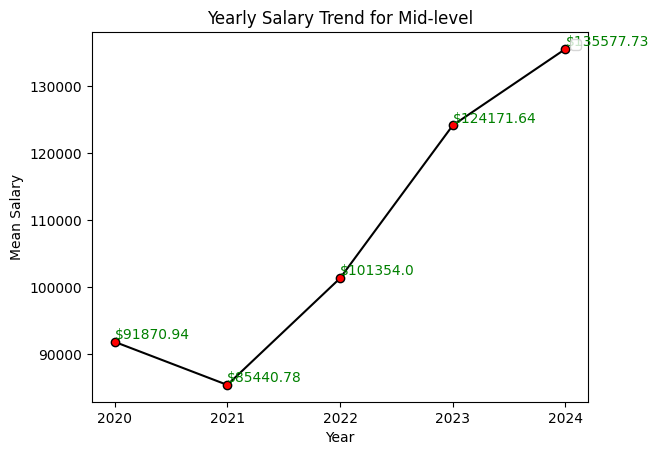

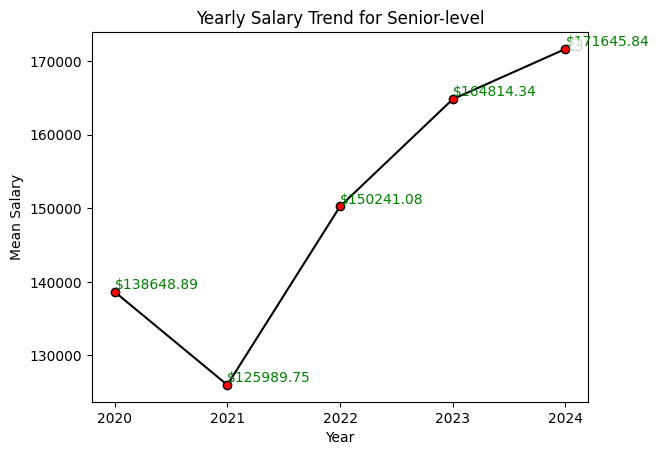

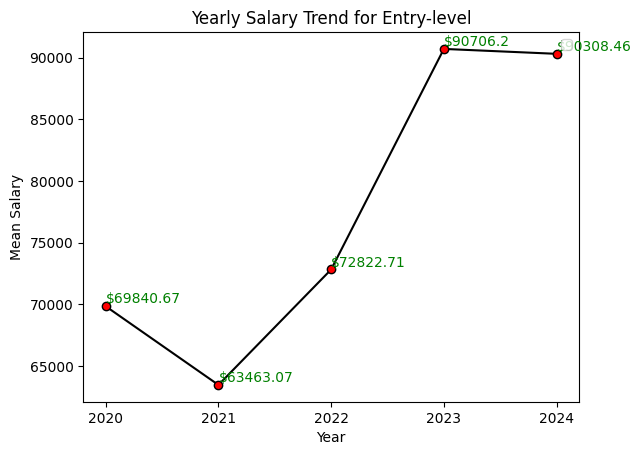

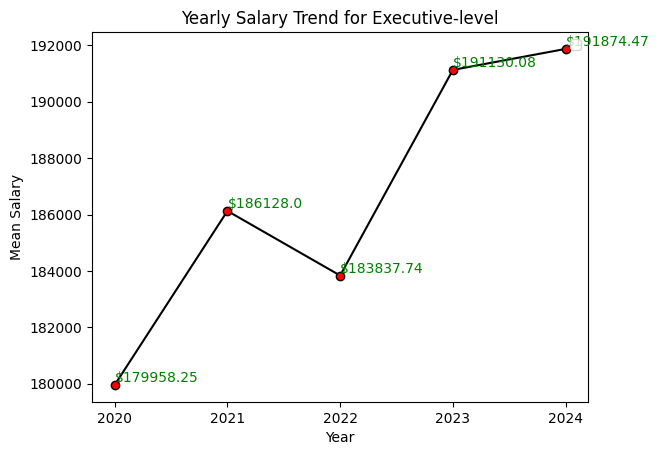

In [ ]:
# Salary against years grouped by seniority: salary_vs_year_by_seniority
seniority = ds_data_q7['experience_level'].unique()

salary_vs_year_by_seniority = ds_data_q7.groupby(['experience_level','work_year'])['salary_in_usd'].mean().reset_index()
salary_vs_year_by_seniority

for index, row in enumerate(seniority) :
    temp_vals = salary_vs_year_by_seniority.set_index('experience_level').loc[row]
    fig = temp_vals.plot('work_year','salary_in_usd', marker = 'o', markerfacecolor = 'red', color = 'black')
    plt.xticks(np.arange(min(temp_vals.work_year.values), max(temp_vals.work_year.values)+1, 1))
    fig.title.set_text(f'Yearly Salary Trend for {row}')
    plt.xlabel('Year')
    plt.ylabel('Mean Salary')
    plt.legend('')
    for index, row in temp_vals.iterrows():
        plt.text(row.work_year, row.salary_in_usd, s = f'${row.salary_in_usd.round(2)}', fontsize = 10, ha='left', va='bottom', color = 'green')

#### Q7 Insights:
The _Yearly Salary Trend_ plot tells that there is an observed increase in the average salary from year-to-year data across all seniority levels. Due to the transitioning of companies to data-driven decision-making, the demand for Data Science professionals are dramatically increasing and the opportunity for them to be paid handsomely is beyond expectations.

### Q8: Do people working on-site earn more than working remotely?

In [55]:
# Subsettting ds_daata for Q8: ds_data_q8
ds_data_q8 = ds_data[['work_models','salary_in_usd']].sort_values('work_models', ascending = False)
ds_data_q8

,work_models,salary_in_usd
0,Remote,148100
3789,Remote,231000
3751,Remote,120096
3752,Remote,168000
3760,Remote,151410
...,...,...
6026,Hybrid,153000
6379,Hybrid,160000
6381,Hybrid,54094
2167,Hybrid,56500


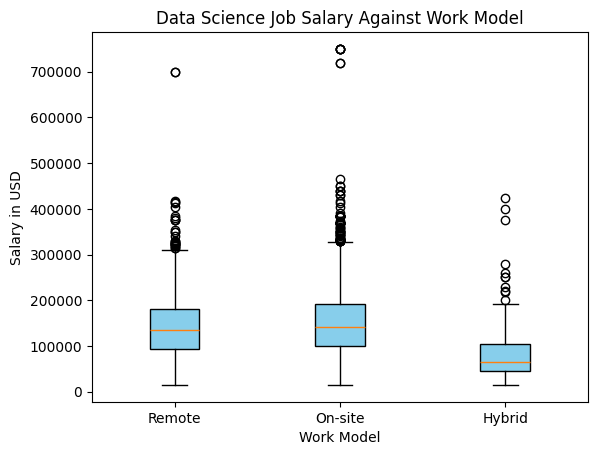

In [68]:
# Salary per work model: salary_per_work_model
mdl = ds_data_q8['work_models'].unique()

salary_per_work_model = []

for m in mdl :
    mdl_vals = ds_data_q8[ds_data_q8['work_models'] == m].salary_in_usd.values
    salary_per_work_model.append(mdl_vals)

plt.boxplot(salary_per_work_model, labels = mdl, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Work Model')
plt.ylabel('Salary in USD')
plt.title('Data Science Job Salary Against Work Model')
plt.show()

#### Q8 Insights:
Based on _Data Science Job Salary Against Work Model_ figure, there is no observed difference between the salary given for those who work on-site versus the employees working remotely. The noteworthy result from this trend is that people who work on a hybrid setup appears to be less compensated than the other work models. 

## Summary

This work has answered questions related to the opportunities in Data Science. To wrap up, the following insights have been drawn from the data analyzed:
- Jobs related to **'AI'** and **'Machine Learning Scientist'** are the hottest Data Science job titles in terms of the average annual salary.
- **Senior Level** positions is relativel higher in number compared to the other seniority levels from 2020 to 2024.
- The number of companies posting freelance Data Science jobs in job boards is very few.
- The number of remote jobs increase but significantly dropped in 2023 and only 3.71% makes up the remote jobs available to foreigners based on the overall number of remote jobs posted over the last 5 years.
- A huge demand in Data Science professionals is expected in the coming years.
- United States is consistent to be on the top 5 highest paying countries across all seniority levels. Bosnia and Herzegovina, Qatar, Israel and the United States ranked first in Entry-, Mid-, Senior- and Executive-level seniorities, respectively; medium-size companies offer much higher salaries compared to other company sizes based on this analysis.
- There is an observed increase in the average salary from year-to-year data across all seniority levels.
- There is no observed difference between the salary given for those who work on-site versus the employees working remotely and people who work on a hybrid setup appears to be less compensated than the other work models.

##  References

https://www.kaggle.com/datasets/sazidthe1/data-science-salaries/data